### ***KKN (K-Nearest-Neighbors Classification)***

In [30]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
excel = "Dataset.xlsx"

# *Test KNN model here!!*

In [26]:
def importdata(excel):
    #import attribute
    x = pd.read_excel(excel, index_col=None, header=1)
    x = x.iloc[:, 0:9]
    x = np.array(x)
    #import class
    y = pd.read_excel(excel, index_col=None, header=1)
    y = y.iloc[:, 9]
    y = np.array(y)
    return x, y

def importtest(excel):
    testset = pd.read_excel(excel, sheet_name=1, header=1, index_col=None)
    testset = testset.iloc[:, 0:9]
    test = np.array(testset)
    test = test.tolist()
    return test

def splitting(x, y, sp):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=sp, random_state=2)
    x_train = x_train.tolist()
    y_train = y_train.tolist()
    x_test = x_test.tolist()
    return x_train, x_test, y_train, y_test

def distance(predict,data):
    euclidean_sum = 0
    for d in range(0, len(predict)):
        dist = (abs(predict[d] - data[d]))**2
        euclidean_sum += dist           
    euclidean = np.sqrt(euclidean_sum)
    return euclidean

def find_neighbours(predict, x, y, k):
    neighbors = []
    classes = []
    p = []
    for i in range(0,k):
        #find the smallest value and its location
        smallest = None
        posi = None
        for d in range(0, len(x)):
            observe = x[d]
            dist = distance(predict, observe)
            if smallest == None or smallest > dist:
                smallest = dist
                posi = d
        p.append(posi)
        #append the satisfies smallest tuples and its classes into neighbor list
        neighbors.append(x[posi])
        classes.append(y[posi])
        #then remove the appended tuple
        x.remove(x[posi])
        y.remove(y[posi])
    return classes

def KNNmodel(excel, k, sp):
    final = []
    x, y = importdata(excel)
    x_train, x_test, y_train, y_test = splitting(x, y, sp)
    for i in range(0,len(x_test)):
        predict = x_test[i] #predicted point
        classes = find_neighbours(predict, x_train, y_train, k)
        result = max(classes, key=classes.count) #find the majority
        final.append(result)
        #reload the dataset using for the next point
        x_train, x_test, y_train, y_test = splitting(x, y, sp)
    return final, y_test

#for testset
def KNNmodel_test(excel, k, sp):
    final = []
    x, y = importdata(excel)
    test = importtest(excel)
    x_train, x_test, y_train, y_test = splitting(x, y, sp)
    for i in range(0,len(test)):
        predict = test[i] #predicted point
        classes = find_neighbours(predict, x_train, y_train, k) #find the neighbors among the training set
        result = max(classes, key=classes.count) #find the majority
        final.append(result)
        #reload the dataset using for the next point
        x_train, x_test, y_train, y_test = splitting(x, y, sp)
    return final

#### Train model here!

In [23]:
#Train model
# the optimal k value is 3 and splitting cut is 0.15
y_pred, y_test = KNNmodel(excel, 3, 0.15)
metrics.accuracy_score(y_pred, y_test)

0.8776595744680851

#### Use model here!

In [29]:
final = KNNmodel_test(excel, 3, 0.15)
len(final)

100

# *Interpretation (Do NOT RUN) !!*

### **import training set**

In [24]:
def importdata(excel):
    #import attribute
    x = pd.read_excel(excel, index_col=None, header=1)
    x = x.iloc[:, 0:9]
    x = np.array(x)
    #import class
    y = pd.read_excel(excel, index_col=None, header=1)
    y = y.iloc[:, 9]
    y = np.array(y)
    return x, y

### import test set

In [25]:
def importtest(excel):
    testset = pd.read_excel(excel, sheet_name=1, header=1, index_col=None)
    testset = testset.iloc[:, 0:9]
    test = np.array(testset)
    test = test.tolist()
    return test

### Do splitting

In [20]:
def splitting(x, y, sp):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=sp, random_state=2)
    x_train = x_train.tolist()
    y_train = y_train.tolist()
    x_test = x_test.tolist()
    return x_train, x_test, y_train, y_test
x_train, x_test, y_train, y_test = splitting(x, y, 0.15)

### **distance calculation**

In [4]:
def distance(predict,data):
    euclidean_sum = 0
    for d in range(0, len(predict)):
        dist = (abs(predict[d] - data[d]))**2
        euclidean_sum += dist           
    euclidean = np.sqrt(euclidean_sum)
    return euclidean

### **Find Neighbour of the point**

In [5]:
def find_neighbours(predict, x, y, k):
    neighbors = []
    classes = []
    p = []
    for i in range(0,k):
        #find the smallest value and its location
        smallest = None
        posi = None
        for d in range(0, len(x)):
            observe = x[d]
            dist = distance(predict, observe)
            if smallest == None or smallest > dist:
                smallest = dist
                posi = d
        p.append(posi)
        #append the satisfies smallest tuples and its classes into neighbor list
        neighbors.append(x[posi])
        classes.append(y[posi])
        #then remove the appended tuple
        x.remove(x[posi])
        y.remove(y[posi])
    return classes

### **For group of test data, KNN test**

In [9]:
def KNNmodel(excel, k, sp):
    final = []
    x, y = importdata(excel)
    x_train, x_test, y_train, y_test = splitting(x, y, sp)
    for i in range(0,len(x_test)):
        predict = x_test[i] #predicted point
        classes = find_neighbours(predict, x_train, y_train, k)
        result = max(classes, key=classes.count) #find the majority
        final.append(result)
        #reload the dataset using for the next point
        x_train, x_test, y_train, y_test = splitting(x, y, sp)
    return final, y_test

### ***Experiment Result***

**Choose the optimal splitting cut**

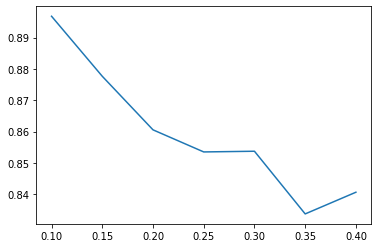

In [12]:
from matplotlib import pyplot as plt
x_p = []
y_pred = []
for i in np.arange(0.1, 0.4, 0.05):
    pred, y_test= KNNmodel(excel, 3, i)
    p = metrics.accuracy_score(y_test, pred)
    y_pred.append(p)
    x_p.append(i)
plt.plot(x_p, y_pred)

**Choose the optimal k value**

3
4
5
6
7
8
9
10
11
12
13
14


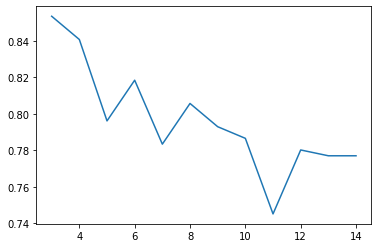

In [133]:
from matplotlib import pyplot as plt
x_p = []
y_pred = []
for k in range(3, 15):
    pred, y_test= KNNmodel(excel, k, 0.25)
    p = metrics.accuracy_score(y_test, pred)
    x_p.append(k)
    y_pred.append(p)
plt.plot(x_p, y_pred)

### ***Accuracy***

In [15]:
y_pred, y_test = KNNmodel(excel, 3, 0.15)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
scores1 = metrics.precision_recall_fscore_support(y_test, y_pred, average='micro')
print(confusion_matrix(y_test,y_pred))
print("Precision: ", scores1[0])
print("Recall: " , scores1[1])
print("F1-Score: " ,scores1[2])

Accuracy: 0.8776595744680851
[[86  1 11]
 [ 1 12  3]
 [ 6  1 67]]
Precision:  0.8776595744680851
Recall:  0.8776595744680851
F1-Score:  0.8776595744680851


In [14]:
y_pred, y_test = KNNmodel(excel, 3, 0.15)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
scores1 = metrics.precision_recall_fscore_support(y_test, y_pred, average='macro')
print(confusion_matrix(y_test,y_pred))
print("Precision: ", scores1[0])
print("Recall: " , scores1[1])
print("F1-Score: " ,scores1[2])

Accuracy: 0.8776595744680851
[[86  1 11]
 [ 1 12  3]
 [ 6  1 67]]
Precision:  0.8696781779219055
Recall:  0.8443188086045228
F1-Score:  0.8550132297472274
